<a href="https://colab.research.google.com/github/RiyaMaurya1/Deep_learning/blob/main/skin_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ["KAGGLE_USERNAME"] = "riyaasat"
os.environ["KAGGLE_KEY"] = "551f8333d17ea1d826c72c8ad68f1ed4"

In [ ]:
!kaggle datasets download nodoubttome/skin-cancer9-classesisic

100% 785M/786M [00:36<00:00, 26.0MB/s]
100% 786M/786M [00:36<00:00, 22.5MB/s]


In [ ]:
! unzip skin-cancer9-classesisic.zip
!pip install gwpy --quiet

Archive:  skin-cancer9-classesisic.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin cancer 

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

In [ ]:
train_path = "dataset/Train"
test_path = "dataset/Test"

In [ ]:
class_names = os.listdir(train_path)

In [ ]:
class_names

['melanoma',
 'seborrheic keratosis',
 'dermatofibroma',
 'squamous cell carcinoma',
 'nevus',
 'vascular lesion',
 'actinic keratosis',
 'basal cell carcinoma',
 'pigmented benign keratosis']

In [ ]:
for name in class_names:
  path = train_path + "/" + name
  n_images = len(os.listdir(path))
  print(name, ": ", n_images)

melanoma :  438
seborrheic keratosis :  77
dermatofibroma :  95
squamous cell carcinoma :  181
nevus :  357
vascular lesion :  139
actinic keratosis :  114
basal cell carcinoma :  376
pigmented benign keratosis :  462


In [ ]:
for name in class_names:
  path = test_path + "/" + name
  n_images = len(os.listdir(path))
  print(name, ": ", n_images)

melanoma :  16
seborrheic keratosis :  3
dermatofibroma :  16
squamous cell carcinoma :  16
nevus :  16
vascular lesion :  3
actinic keratosis :  16
basal cell carcinoma :  16
pigmented benign keratosis :  16


In [ ]:
random_image = "dataset/Train/dermatofibroma/ISIC_0025314.jpg"

In [ ]:
img = cv2.imread(random_image)

In [ ]:
img.shape

(450, 600, 3)

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
def load_data(path):
  images_list = []
  labels_list = []
  for i in range(len(class_names)):
    dirpath = path + "/" + class_names[i]
    images = (os.listdir(dirpath))
    for j in tqdm (range (len(images))):
      img_path = dirpath + '/' + images[j]
      img = cv2.imread(img_path)
      img = cv2.resize(img, (224,224))
      #Normalizing the images
      images_list.append(img/255.0)
      labels_list.append(i)

  # Before typecasting as array there was only a list of images
  images_list = np.asarray(images_list)
  labels_list = np.asarray(labels_list)
  return images_list, labels_list

In [ ]:
train_images,train_labels = load_data(train_path)

100%|██████████| 462/462 [00:04<00:00, 110.21it/s]


In [ ]:
len(train_images)

2239

In [ ]:
train_images.shape
# The dimensions should be no. of images , row, col, colorchannel
# but there is no detail about images that is because all the images are of different size

(2239, 224, 224, 3)

In [ ]:
train_images[0].shape

(224, 224, 3)

In [ ]:
train_images[546].shape

(224, 224, 3)

In [ ]:
# We'll tweak some changes above to correct this.


In [ ]:
test_images, test_labels = load_data(test_path)

100%|██████████| 16/16 [00:00<00:00, 70.07it/s]


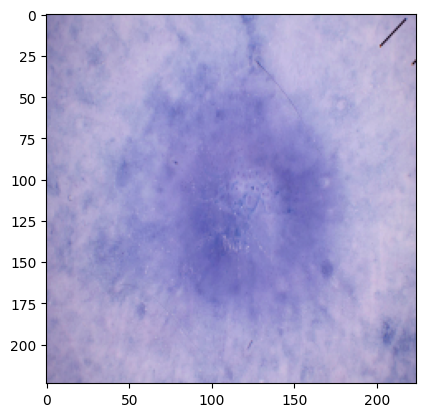

In [ ]:
plt.imshow(train_images[564])
plt.show()

In [ ]:
# vgfhfghhf

In [ ]:
BUFFER_SIZE = 500
BATCH_SIZE = 32

In [ ]:
2239 / 32

69.96875

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, AvgPool2D
from tensorflow.keras.models import Model

In [ ]:
train_df = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_df = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

In [ ]:
train_df


<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:

# first we inherit Model class
class MyModel(Model):
  # __init__ - constructor
  def __init__(self):
    # calling parent class constructor
    super().__init__()
    # first convolutional layer
    # 32 - number of filters
    # 3 - 3x3 kernel size (filter window size)
    self.conv_1_1 = Conv2D(64, 3, activation="relu")
    self.conv_1_2 = Conv2D(64, 3, activation="relu")
    # MaxPooling Layer
    self.pool_1 = MaxPool2D(pool_size=(2,2))
    self.conv_2_1 = Conv2D(128, 3, activation="relu")
    self.conv_2_1 = Conv2D(128, 3, activation="relu")
    # MaxPooling Layer
    self.pool_2 = AvgPool2D(pool_size=(2,2))
    self.conv_3_1 = Conv2D(256, 3, activation="relu")
    self.conv_3_2 = Conv2D(256, 3, activation="relu")
    # MaxPooling Layer
    self.pool_3 = AvgPool2D(pool_size=(2,2))
    # Apply flatten
    self.flatten = Flatten()
    # Hidden Layer
    self.hidden_1 = Dense(512, activation="relu")
    self.hidden_2 = Dense(256, activation="relu")
    # Output layer
    self.output_layer = Dense(9, activation="softmax")

  def call(self, data):
    x = self.conv_1(data)
    x = self.pool_1(x)
    x = self.conv_2(x)
    x = self.pool_2(x)
    x = self.conv_3(x)
    x = self.pool_3(x)
    x = self.flatten(x)
    x = self.hidden_1(x)
    x = self.hidden_2(x)
    return self.output_layer(x)

In [ ]:
model = MyModel()

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop()

train_acc = tf.keras.metrics.SparseCategoricalAccuracy(name="train_acc")
test_acc = tf.keras.metrics.SparseCategoricalAccuracy(name="test_acc")

train_loss = tf.keras.metrics.Mean(name="train_loss")
test_loss = tf.keras.metrics.Mean(name="test_loss")

In [ ]:
# Decorators - we pass function as an argument in another function
# Here @tf.function is a decorator
# Now it means that there is function in tensorflow whose name is "function"
# now when model starts to train then train_step function will be passed as an argument inside tf.function

@tf.function
def train_step(train_images, train_labels):
  # now once we start tensorflow graph then it will initiate process of Gradient Descent
  with tf.GradientTape() as tape:
    # it will execute call() that we have defined in our class
    predictions = model(train_images)
    # then we calculate loss on our training data
    loss = loss_object(train_labels, predictions)

  # Optimization
  # it will keep track of gradients for your computations
  grad = tape.gradient(loss, model.trainable_variables)
  # apply optimization - it will update weights and bias
  optimizer.apply_gradients(zip(grad, model.trainable_variables))

  train_loss(loss)
  train_acc(train_labels, predictions)

In [ ]:
@tf.function
def test_step(test_images, test_labels):
  predictions = model(test_images, training=False)
  loss = loss_object(test_labels, predictions)
  test_loss(loss)
  test_acc(test_labels, predictions)

In [ ]:
epochs = 100

for epoch in range(epochs):
  train_loss.reset_states()
  test_acc.reset_states()
  test_loss.reset_states()
  test_acc.reset_states()
  for images, labels in train_df:
    train_step(images, labels)

  for images, labels in test_df:
    test_step(images, labels)

  print("Epoch : {} | Train Loss : {} | Train Acc : {} | Test Loss : {} | Test Acc : {}".format(epoch,
                                                                                                train_loss.result(),
                                                                                                train_acc.result(),
                                                                                                test_loss.result(),
                                                                                                test_acc.result()))

Epoch : 0 | Train Loss : 1.7366057634353638 | Train Acc : 0.43546226620674133 | Test Loss : 3.0054125785827637 | Test Acc : 0.1355932205915451
Epoch : 1 | Train Loss : 1.5717881917953491 | Train Acc : 0.44908440113067627 | Test Loss : 2.817755937576294 | Test Acc : 0.1355932205915451
Epoch : 2 | Train Loss : 1.471693992614746 | Train Acc : 0.4600268006324768 | Test Loss : 3.1331839561462402 | Test Acc : 0.20338982343673706
Epoch : 3 | Train Loss : 1.4434397220611572 | Train Acc : 0.4671728312969208 | Test Loss : 3.1296753883361816 | Test Acc : 0.1355932205915451
Epoch : 4 | Train Loss : 1.3324687480926514 | Train Acc : 0.47896382212638855 | Test Loss : 3.578612804412842 | Test Acc : 0.16101695597171783
Epoch : 5 | Train Loss : 1.311374306678772 | Train Acc : 0.4913651943206787 | Test Loss : 2.9064993858337402 | Test Acc : 0.20338982343673706
Epoch : 6 | Train Loss : 1.2895089387893677 | Train Acc : 0.4999043047428131 | Test Loss : 3.190091133117676 | Test Acc : 0.18644067645072937
Epoc

In [ ]:
#nffhdfhdsjfh